In [514]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import ensemble

In [515]:
#load the data
df = pd.read_csv('/Users/Evelyn/Desktop/Python_R_Tutorial/Python/movie_metadata.csv')

In [516]:
#Let's see what the data looks like
df.iloc[0:10,11:20]

,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language
0,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English
1,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English
2,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English
3,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English
4,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN
5,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English
6,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English
7,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English
8,Avengers: Age of Ultron,462669,92000,Scarlett Johansson,4.0,artificial intelligence|based on comic book|ca...,http://www.imdb.com/title/tt2395427/?ref_=fn_t...,1117.0,English
9,Harry Potter and the Half-Blood Prince,321795,58753,Rupert Grint,3.0,blood|book|love|potion|professor,http://www.imdb.com/title/tt0417741/?ref_=fn_t...,973.0,English


In [517]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
color                        5024 non-null object
director_name                4939 non-null object
num_critic_for_reviews       4993 non-null float64
duration                     5028 non-null float64
director_facebook_likes      4939 non-null float64
actor_3_facebook_likes       5020 non-null float64
actor_2_name                 5030 non-null object
actor_1_facebook_likes       5036 non-null float64
gross                        4159 non-null float64
genres                       5043 non-null object
actor_1_name                 5036 non-null object
movie_title                  5043 non-null object
num_voted_users              5043 non-null int64
cast_total_facebook_likes    5043 non-null int64
actor_3_name                 5020 non-null object
facenumber_in_poster         5030 non-null float64
plot_keywords                4890 non-null object
movie_imdb_link              5043 non-

In [518]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [519]:
df.describe(include=['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Home,John Heard,based on novel,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


In [520]:
#Let's see how many null value in this data and try to clean it.
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [521]:
#Data preprocessing

#replacing NAN in numeric features by mean value
df = df.fillna(df.mean())

In [522]:
#relpacing NAN in character features by mode value
for col in (['color','language','country','content_rating']):
    mode = df[col].mode()[0]
    df[col] = df[col].fillna(mode)

In [523]:
df.isnull().sum()

color                          0
director_name                104
num_critic_for_reviews         0
duration                       0
director_facebook_likes        0
actor_3_facebook_likes         0
actor_2_name                  13
actor_1_facebook_likes         0
gross                          0
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster           0
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews           0
language                       0
country                        0
content_rating                 0
budget                         0
title_year                     0
actor_2_facebook_likes         0
imdb_score                     0
aspect_ratio                   0
movie_facebook_likes           0
dtype: int64

In [524]:
df.duplicated().sum()

45

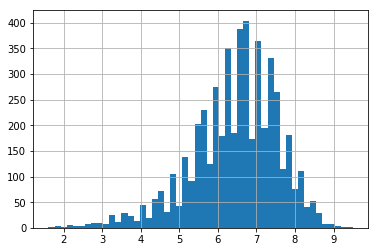

In [525]:
## Data visualization
df.imdb_score.hist(bins=50)
plt.show()

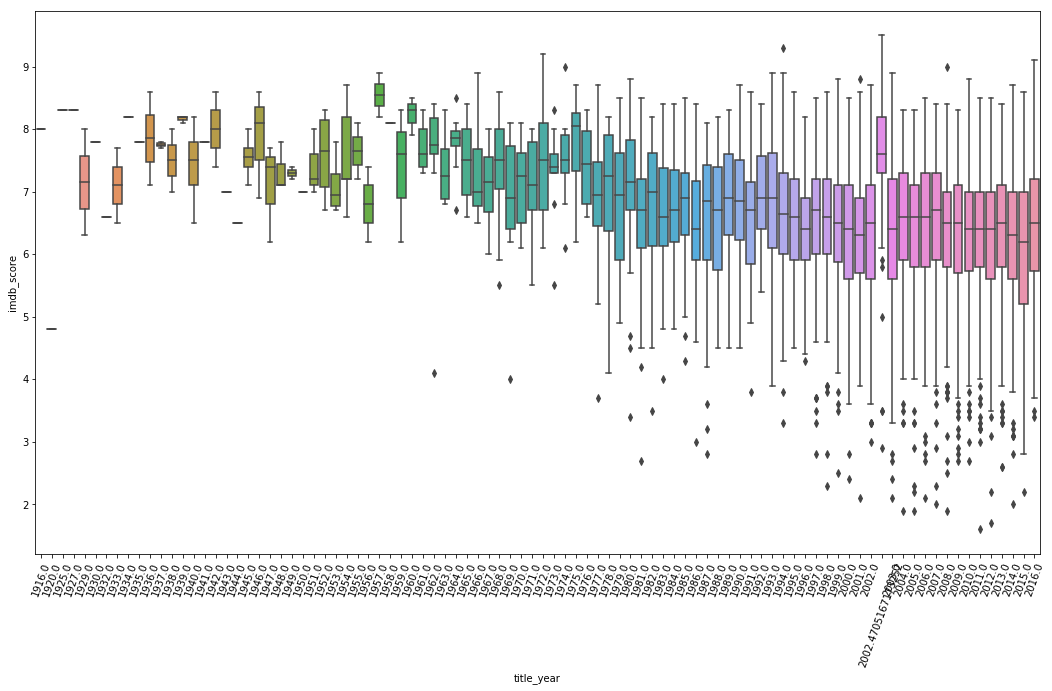

In [526]:
#Let's see the relationship bewteen year and imdb score
plt.figure(figsize=(18,10))
sns.boxplot(x=df.title_year, y=df.imdb_score)
plt.xticks(rotation=70)
plt.show()

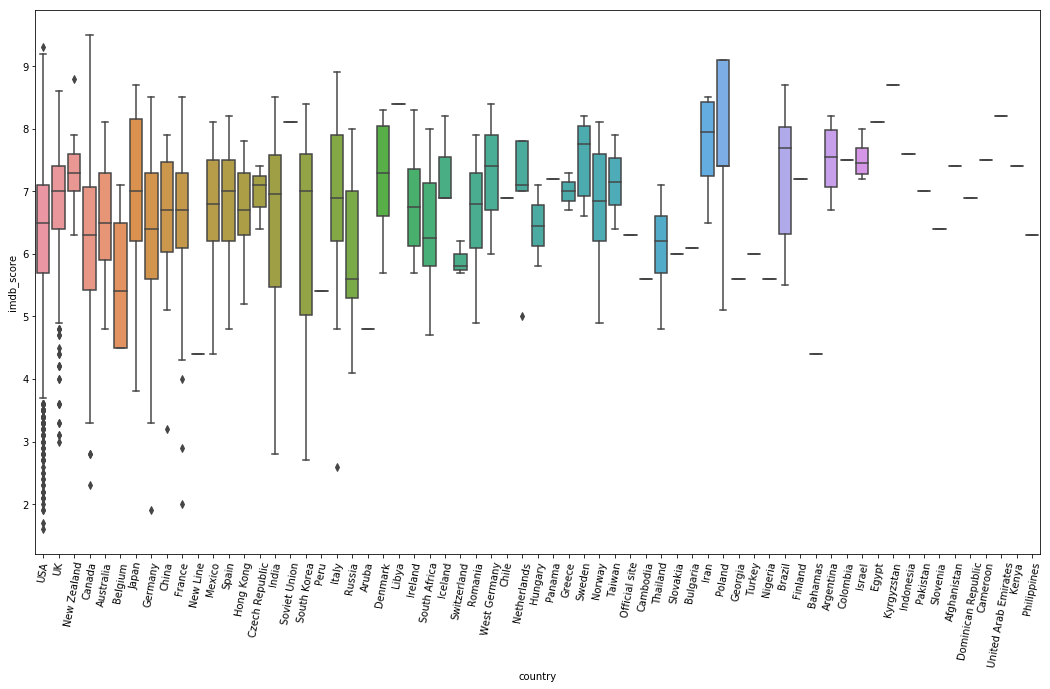

In [527]:
#country vs imdb_score
plt.figure(figsize=(18,10))
sns.boxplot(x=df.country, y=df.imdb_score)
plt.xticks(rotation=80)
plt.show()

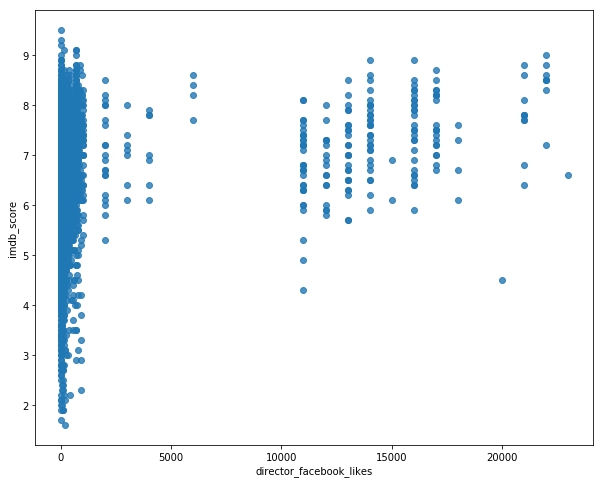

In [528]:
#director_facebook_likes and imdb_score
plt.figure(figsize=(10,8))
sns.regplot(x=df.director_facebook_likes, y=df.imdb_score,fit_reg=False)
plt.show()

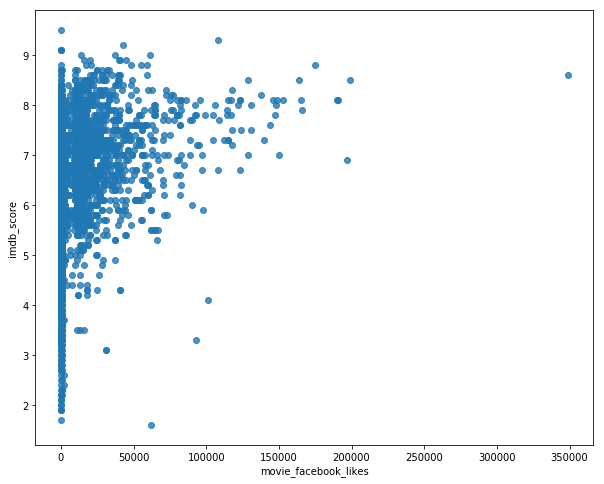

In [529]:
#movie_facebook_likes vs imdb_score
plt.figure(figsize=(10,8))
sns.regplot(x=df.movie_facebook_likes, y=df.imdb_score,fit_reg=False)
plt.show()

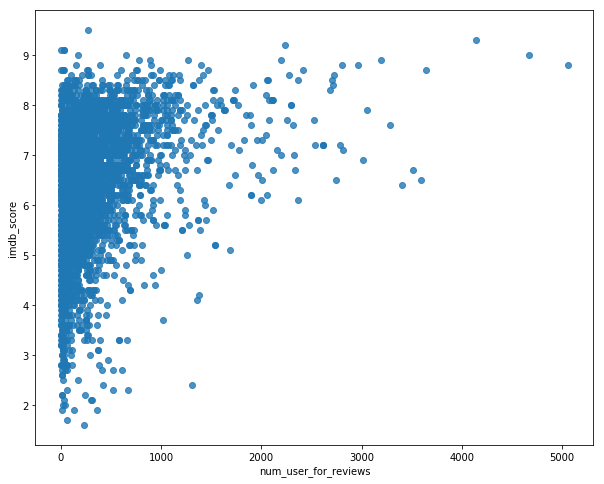

In [530]:
#num_user_for_reviews vs imdb_score
plt.figure(figsize=(10,8))
sns.regplot(x=df.num_user_for_reviews, y=df.imdb_score,fit_reg=False)
plt.show()

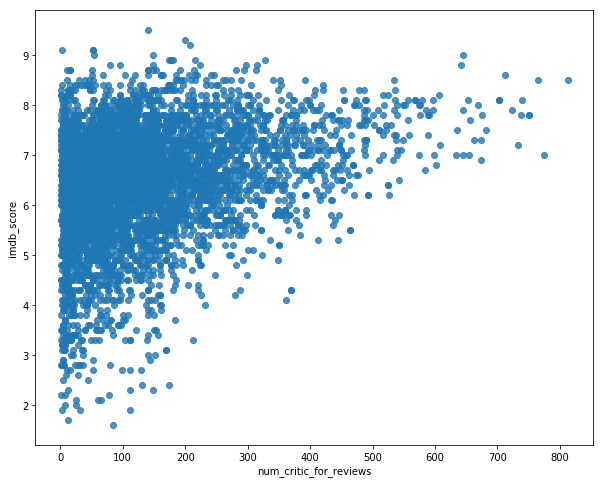

In [531]:
#num_critic_for_reviews vs imdb_score
plt.figure(figsize=(10,8))
sns.regplot(x=df.num_critic_for_reviews, y=df.imdb_score,fit_reg=False)
plt.show()

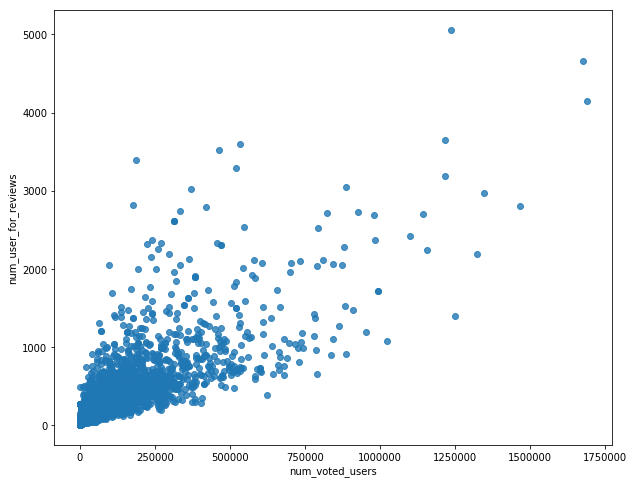

In [532]:
#num_voted_users vs num_user_for_reviews; It turns out that they are highly correlated
plt.figure(figsize=(10,8))
sns.regplot(x=df.num_voted_users, y=df.num_user_for_reviews,fit_reg=False)
plt.show()

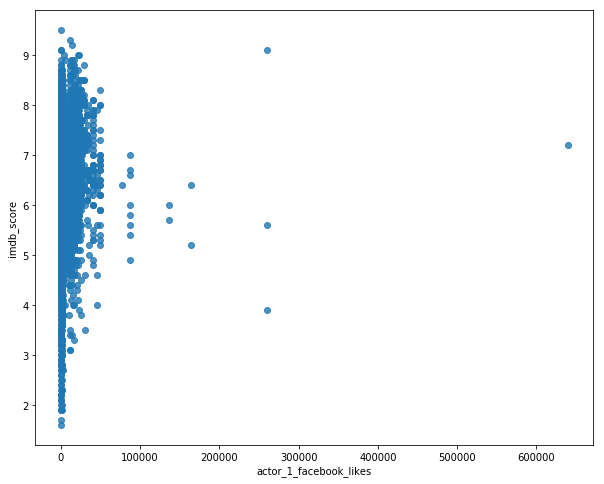

In [533]:
#actor_1_facebook_likes vs imdb_score
plt.figure(figsize=(10,8))
sns.regplot(x=df.actor_1_facebook_likes, y=df.imdb_score,fit_reg=False)
plt.show()

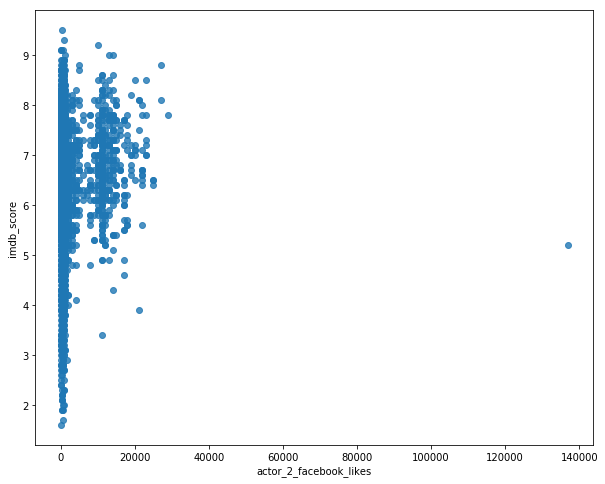

In [534]:
#actor_2_facebook_likes vs imdb_score
plt.figure(figsize=(10,8))
sns.regplot(x=df.actor_2_facebook_likes, y=df.imdb_score,fit_reg=False)
plt.show()

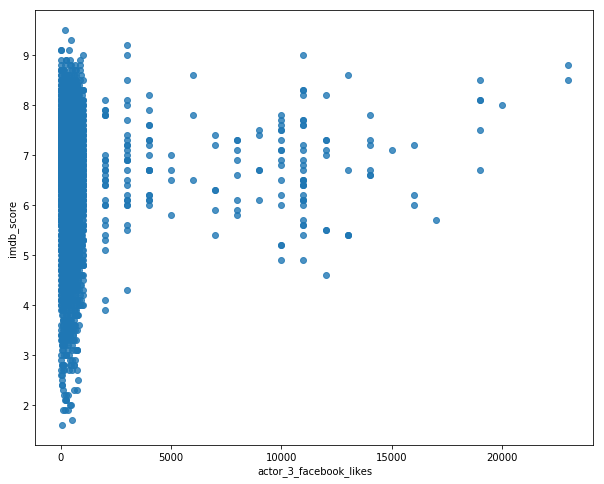

In [535]:
#actor_3_facebook_likes vs imdb_score
plt.figure(figsize=(10,8))
sns.regplot(x=df.actor_3_facebook_likes, y=df.imdb_score,fit_reg=False)
plt.show()

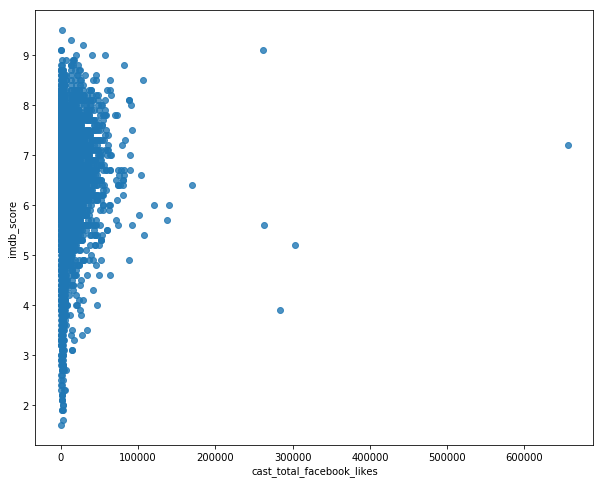

In [536]:
#cast_total_facebook_likes vs imdb_score
plt.figure(figsize=(10,8))
sns.regplot(x=df.cast_total_facebook_likes, y=df.imdb_score,fit_reg=False)
plt.show()

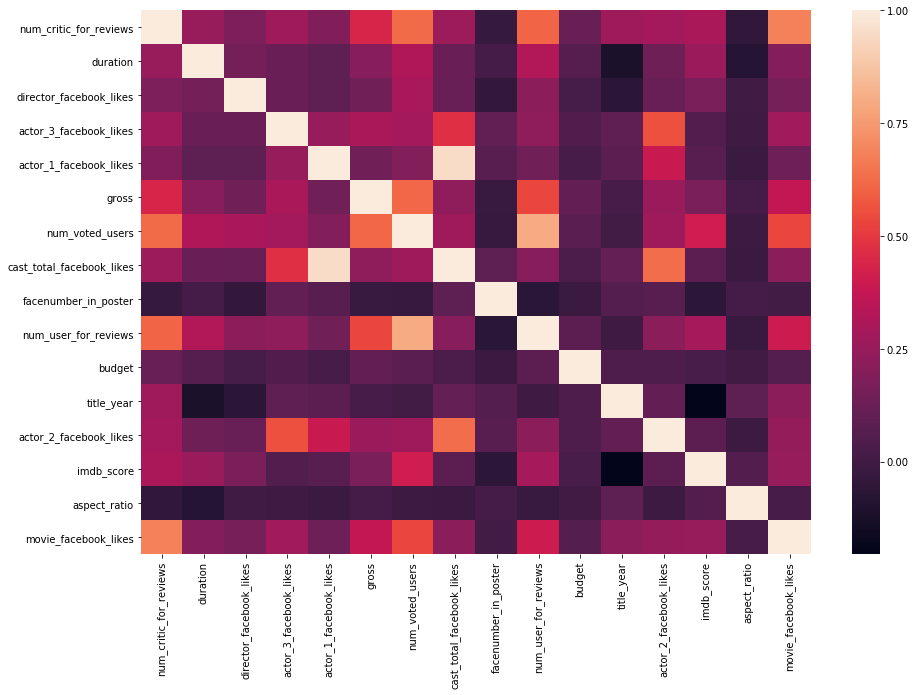

In [537]:
#correlationship between different features, by which we can select features for the statistical model
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.show()

In [538]:
#dropping 'cast_total_facebook_likes' as 'cast_total_facebook_likes' and 'actor_1_facebook_likes' are highly correlated.
df = df.drop('cast_total_facebook_likes',axis=1)
#dropping 'number_user_for_reviews' as 'number_user_for_reviews' and 'num_voted_users' are highly correlated
df = df.drop('num_user_for_reviews', axis=1)

In [539]:
df.shape

(5043, 26)

In [540]:
#selecting relevant features
data = df[['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes',
           'actor_1_facebook_likes','gross','num_voted_users','facenumber_in_poster',
           'budget','title_year','actor_2_facebook_likes','movie_facebook_likes','imdb_score']]

In [541]:
#convert character features into categorical features
data['color'] = df['color'].map({'Color':1,' Black and White':2})

/Users/Evelyn/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [542]:
#check how many genre types is there in all movies
a = df.genres.str.split('|')
b = []
for row in range(len(a)):
    for elem in a[row]:
        b.append(elem)

pd.Series(b).value_counts()

Drama          2594
Comedy         1872
Thriller       1411
Action         1153
Romance        1107
Adventure       923
Crime           889
Sci-Fi          616
Fantasy         610
Horror          565
Family          546
Mystery         500
Biography       293
Animation       242
Music           214
War             213
History         207
Sport           182
Musical         132
Documentary     121
Western          97
Film-Noir         6
Short             5
News              3
Reality-TV        2
Game-Show         1
dtype: int64

In [543]:
#Replacing rare movie genres with Other
genres = df.genres.str.replace('Sport|Musical|Documentary|Western|Film-Noir|Short|News|Reality-TV|Game-Show','Other_Genres')

#getting dummy variable based on genres
genres_dumm = genres.str.get_dummies(sep='|')

data = pd.concat([data,genres_dumm], axis=1)

In [544]:
df.content_rating.value_counts()
content = df.content_rating.str.replace('Not Rated|GP|(^G$)|Unrated|Approved|TV-14|TV-MA|X|TV-PG|TV-G|Passed|NC-17|M|TV-Y7|TV-Y',
                                       'Other-rated')
content_dumm = content.str.get_dummies()
content_dumm.sum(axis=0)

data = pd.concat([data, content_dumm], axis = 1)

In [545]:
x_data = data.loc[:,data.columns!='imdb_score']
y_data = data.loc[:,data.columns == 'imdb_score']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data,test_size=0.2, random_state = 3983)

In [546]:
dim_x = x_data.shape[1]

In [548]:
#Creating neural network model using tensorflow
x = tf.placeholder(tf.float32,[None,dim_x])
y = tf.placeholder(tf.float32,[None,1])
lr = tf.Variable(0.12,dtype=tf.float32)

#1st layer
w1 = tf.Variable(tf.random_normal([dim_x,10]))
b1 = tf.Variable(tf.zeros([10]) + 0.01)
wx_b_1 = tf.matmul(x,w1) + b1
L1 = tf.nn.tanh(wx_b_1)

#2st layer
w2 = tf.Variable(tf.random_normal([10,10]))
b2 = tf.Variable(tf.zeros([10])+ 0.01) 
wx_b_2= tf.matmul(L1,w2) + b2
L2 = tf.nn.tanh(wx_b_1)

#output layer
w3 = tf.Variable(tf.random_normal([10,1]))
b3 = tf.Variable(tf.zeros([1])+0.01)
wx_b_3 = tf.matmul(L2,w3) + b3
prediction = wx_b_3

#least square loss function
loss = tf.reduce_mean(tf.square(prediction - y))

#Gradient Descent optimizer 
train_step = tf.train.GradientDescentOptimizer(lr).minimize(loss)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(100):
        sess.run(tf.assign(lr, 0.12*(0.95**epoch)))
        sess.run(train_step, feed_dict={x: x_train, y:y_train})
        if epoch%10 ==0:
            MSE = sess.run(loss, feed_dict={x: x_test, y:y_test})
            learning_rate = sess.run(lr)
            print('Iter ' + str(epoch) + ', MSE = ' + str(MSE)+ ', learning_rate = ' + str(learning_rate))

Iter 0, MSE = 80.30995, learning_rate = 0.12
Iter 10, MSE = 1.4890482, learning_rate = 0.07184843
Iter 20, MSE = 1.3747965, learning_rate = 0.04301831
Iter 30, MSE = 1.341392, learning_rate = 0.025756652
Iter 40, MSE = 1.3274703, learning_rate = 0.0154214585
Iter 50, MSE = 1.320609, learning_rate = 0.009233397
Iter 60, MSE = 1.3169249, learning_rate = 0.005528376
Iter 70, MSE = 1.3148532, learning_rate = 0.003310043
Iter 80, MSE = 1.313658, learning_rate = 0.001981845
Iter 90, MSE = 1.3129574, learning_rate = 0.0011866038


In [549]:
#Linear Regression Model
linear = linear_model.LinearRegression()
linear.fit(x_train,y_train)
predict_linear = linear.predict(x_test)
MSE_linear = mean_squared_error(predict_linear, y_test)
#print(predict_linear)
print('Mean Square Error:')
print(MSE_linear)

Mean Square Error:
0.7414609964140908


In [550]:
#Naive Bayes Regression
NB = linear_model.BayesianRidge()
NB.fit(x_train, y_train)
predict_NB = NB.predict(x_test)
MSE_linear = mean_squared_error(predict_NB, y_test)
print('Mean Square Error: ')
print(MSE_linear)

Mean Square Error: 
0.7428439079056022


/Users/Evelyn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [551]:
#Let's try an ensemble model, the Gradient Boosting regressor model and see the Mean Square Error:
gbdt = ensemble.GradientBoostingRegressor()
gbdt.fit(x_train,y_train)
predict_gbdt = gbdt.predict(x_test)
MSE_gbdt = mean_squared_error(predict_gbdt, y_test)
print('Mean Square Error: ')
print(MSE_gbdt)

/Users/Evelyn/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Square Error: 
0.5405604876496016


In [552]:
#Let's see which features are important to the model.
gbdt.feature_importances_

array([0.08747859, 0.08798899, 0.02816458, 0.02290617, 0.03095827,
       0.05839821, 0.21796459, 0.02229418, 0.09893937, 0.09676303,
       0.01845914, 0.03682564, 0.01168024, 0.01805085, 0.        ,
       0.02285908, 0.0092446 , 0.01085562, 0.00461302, 0.02891973,
       0.        , 0.00534178, 0.0047099 , 0.02466113, 0.        ,
       0.        , 0.00646227, 0.00286244, 0.01197932, 0.0064051 ,
       0.        , 0.00041002, 0.00135723, 0.01938099, 0.00306593])

In [ ]:
#Based on the cleaning, feature-creation and model-creation of the data, we can get a best answer
#with Gradient Boosting Regressor model. From the feature_importances_ attribute, we can see which features
#are important to the prediction, which also make the interpretion of the model more meaningful to people.